# CLUSTERING
#### We have a sample dataset. We will first plot the data using maplotlib and then we will use clustering algorithms provided by scikit learn to seperate the data into clusters.

#### Getting the data

In [24]:
import pandas as pd

In [25]:
data = pd.read_csv('sampledata.csv')
print(data.head())

          0         1
0  0.896765  1.143127
1  0.973851  0.929172
2 -1.839089  0.348506
3 -1.045098  0.072468
4  0.820274 -0.710225


#### Visualising the data

In [26]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [27]:
import numpy as np

In [28]:
X = np.array(data)
print(X[:5])

[[ 0.89676469  1.14312679]
 [ 0.97385117  0.92917238]
 [-1.83908852  0.34850623]
 [-1.04509772  0.07246805]
 [ 0.82027371 -0.7102251 ]]


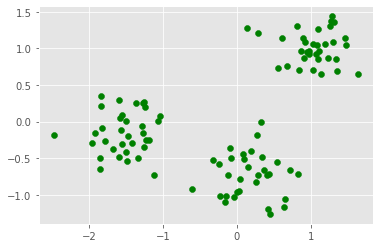

In [29]:
for i in range(len(data)):
    plt.scatter(X[i][0],X[i][1],color='g')
plt.show()

#### Thus we see that the data can actually be divided into 3 clusters. This is just the observation of eye.

## K MEANS 

In [30]:
from sklearn.cluster import KMeans

##### Training data

In [31]:
clf_1 = KMeans(n_clusters=2)
clf_1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### Getting the Labels

In [32]:
Y = clf_1.labels_
print(Y)

[0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1
 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1]


#### Geting the cluster Centroids

In [33]:
G1 = clf_1.cluster_centers_
print(G1)

[[ 1.03626228  1.01335552]
 [-0.70039554 -0.43185185]]


#### Visualization

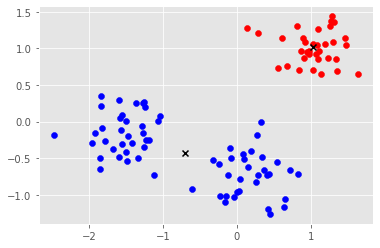

In [34]:
for i in range(len(data)):
    if(Y[i] == 1):
        c = 'b'
    else:
        c = 'r'
    plt.scatter(X[i][0],X[i][1],color=c)

for i in range(2):
    plt.scatter(G1[i][0],G1[i][1],color='k',marker='x')
    
plt.show()

### We can clearly see that it is not the optimum clustering; so now we will use KMeans again with K=3

#### Training Data

In [35]:
clf_2 = KMeans(n_clusters=3)
clf_2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### Getting the Labels 

In [36]:
Y1 = clf_2.labels_
print(Y1)

[1 1 2 2 0 0 1 0 0 2 0 0 2 0 1 1 0 1 1 0 1 1 2 1 2 0 2 1 1 1 2 0 0 2 2 1 2
 2 2 2 1 0 2 0 2 2 0 1 2 2 1 1 0 1 0 1 2 1 2 2 2 0 0 0 2 2 0 2 0 2 1 1 1 0
 2 0 0 0 1 0 1 0 1 0 1 2 1 0 2 0 1 1 2 2 1 1 1 2 0 2]


#### Getting the centroids

In [38]:
G2 = clf_2.cluster_centers_
print(G2)

[[ 0.17135014 -0.73150387]
 [ 1.03626228  1.01335552]
 [-1.52086207 -0.14982642]]


#### Visualization

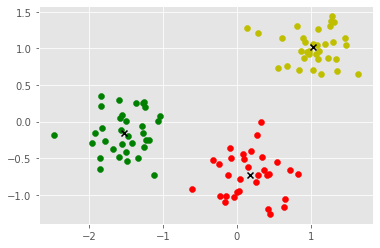

In [53]:
for i in range(len(data)):
    if(Y1[i]==0):
        c='r'
    elif(Y1[i]==1):
        c='y'
    elif(Y1[i]==2):
        c='g'
    plt.scatter(X[i][0],X[i][1],color=c)

for i in range(len(G2)):
    plt.scatter(G2[i][0],G2[i][1],color='k',marker='x')

plt.show()

### I Personaly Don't Think that It's Good for us to decide the number of Clusters (Until and Unless Specified). It  Would be great if our algorithm classifies our data into clusters on their own. 
#### NOTE : The default number of clusters for KMeans in Scikit Learn is 8

## MEAN SHIFT

In [54]:
from sklearn.cluster import MeanShift

#### Training Data

In [55]:
clf_3 = MeanShift()
clf_3.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

#### Getting Labels

In [58]:
Y2 = clf_3.labels_
print(Y2)

[1 1 0 0 2 2 1 2 2 0 2 2 0 2 1 1 2 1 1 2 1 1 0 1 0 2 0 1 1 1 0 2 2 0 0 1 0
 0 0 0 1 2 0 2 0 0 2 1 0 0 1 1 2 1 2 1 0 1 0 0 0 2 2 2 0 0 2 0 2 0 1 1 1 2
 0 2 2 2 1 2 1 2 1 2 1 0 1 2 0 2 1 1 0 0 1 1 1 0 2 0]


###### Above we see that we did not need to specify the number of clusters we wanted. 

#### Getting Centroids

In [59]:
G3 = clf_3.cluster_centers_
print(G3)

[[-1.49194779 -0.14861035]
 [ 1.08817183  0.99856957]
 [ 0.19665497 -0.7253599 ]]


#### Visualizing

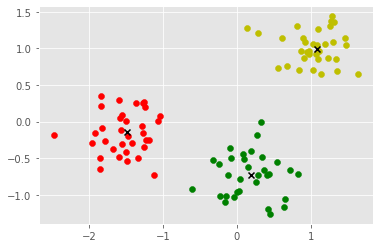

In [60]:
for i in range(len(data)):
    if(Y2[i]==0):
        c='r'
    elif(Y2[i]==1):
        c='y'
    elif(Y2[i]==2):
        c='g'
    plt.scatter(X[i][0],X[i][1],color=c)

for i in range(len(G3)):
    plt.scatter(G3[i][0],G3[i][1],color='k',marker='x')

plt.show()

#### We can say that MeanShift is an Excellent Algorithm. We did not need to specify the number of clusters. We also did not need to specify the bandwidth(Radius for MeanShift) SkLearn does that for us too!! However we can change the bandwidth according to ourselves

## HIERARCHIAL CLUSTERING(AGGLOMERATIVE)

In [61]:
from sklearn.cluster import AgglomerativeClustering

#### Training Data
##### NOTE: THE DEFAULT NO. OF CLUSTERS IS 2 For Agglomerative Clustering

In [66]:
clf_4 = AgglomerativeClustering(n_clusters=3)
clf_4.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

#### Getting Labels

In [67]:
Y3 = clf_4.labels_
print(Y3)

[1 1 0 0 2 2 1 2 2 0 2 2 0 2 1 1 2 1 1 2 1 1 0 1 0 2 0 1 1 1 0 2 2 0 0 1 0
 0 0 0 1 2 0 2 0 0 2 1 0 0 1 1 2 1 2 1 0 1 0 0 0 2 2 2 0 0 0 0 2 0 1 1 1 2
 0 2 2 2 1 2 1 2 1 2 1 0 1 2 0 2 1 1 0 0 1 1 1 0 2 0]


#### Note that There are No Centroids for Agglomerative Clustering. This is because its a bottom up process; where at first it has n clusters for n data points and at last it has 1 Cluster for n data points;

#### REMEMBER THE TREE STRUCTURE

#### VISUALIZATION

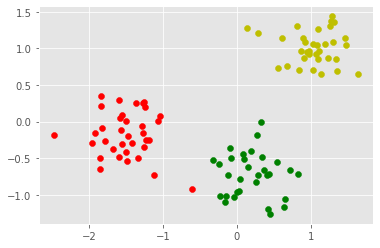

In [70]:
for i in range(len(data)):
    if(Y3[i]==0):
        c='r'
    elif(Y3[i]==1):
        c='y'
    elif(Y3[i]==2):
        c='g'
    plt.scatter(X[i][0],X[i][1],color=c)
plt.show()

## DBSCAN

In [71]:
from sklearn.cluster import DBSCAN

#### Training Data

In [73]:
clf_5 = DBSCAN()
clf_5.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

##### above we can see; eps =0.5 i.e the max distance b/w 2 samples so that they are considered as neighbors;  min_samples=5, i.e the number of samples in a neighborhood for a point to be considered as core point

#### Getting Labels

In [74]:
Y4 = clf_5.labels_
print(Y4)

[ 0  0  1  1  2  2  0  2  2  1  2  2  1  2 -1  0  2  0  0  2  0  0  1  0
  1  2  1  0  0  0  1  2  2  1  1  0  1  1  1  1  0  2  1  2  1  1  2  0
  1  1  0  0  2  0  2  0  1  0  1  1  1  2  2  2  1  1  2  1  2  1  0  0
  0  2  1  2  2  2  0  2  0  2  0  2  0  1  0  2  1  2  0  0 -1  1  0  0
  0  1  2  1]


#### No cluster points here too; we just have core points, edge points and outliers

#### VISUALIZATION

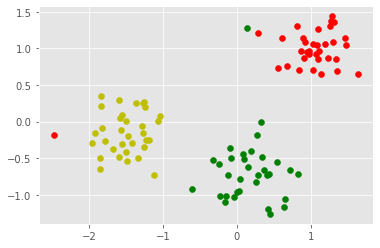

In [75]:
for i in range(len(data)):
    if(Y4[i]==0):
        c='r'
    elif(Y4[i]==1):
        c='y'
    elif(Y4[i]==2):
        c='g'
    plt.scatter(X[i][0],X[i][1],color=c)
plt.show()

### We can Clearly see Discripencies here; So I preferably don't use this algorithm. Even I don't  know a lot about this algorithm; so I don't Consider Using it

# Thus;  We have completed Clustering;

## Now we will see when to use which algorithm;

### 1) KMeans - When we are specified the number of clusters we have to divide the data into.
### 2) MeanShift -  We don't know how many clusters we have to divide the data into. So we divide them into optimal number of clusters
### 3) Agglomerative - The algorithm already divides the data in many  clusters parallely(We can say not parallely; as We se the tree diagram.) We just have to chose the no. of clusters